# Avocado Project
Problem Statement:
Avocado is a fruit consumed by people heavily in the United States. 

Content
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

Date - The date of the observation
AveragePrice - the average price of a single avocado
type - conventional or organic
year - the year
Region - the city or region of the observation
Total Volume - Total number of avocados sold
4046 - Total number of avocados with PLU 4046 sold
4225 - Total number of avocados with PLU 4225 sold
4770 - Total number of avocados with PLU 4770 sold


Inspiration /Label 

 Task is to make a model that can consider the data provided and predict the Average Price.

In [1]:
#Importing All Libraries:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
import sklearn
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset 

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/avocado.csv")
# pd.set_option('display.max_rows',None)
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [3]:
df.shape

(16468, 14)

In [4]:
df.dtypes

Unnamed: 0      float64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year            float64
region           object
dtype: object

In [5]:
df.nunique()

Unnamed: 0        52
Date             104
AveragePrice     113
Total Volume    1517
4046            1517
4225            1517
4770            1516
Total Bags      1517
Small Bags      1517
Large Bags      1377
XLarge Bags      711
type               1
year               2
region            51
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16468 entries, 0 to 16467
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1517 non-null   float64
 1   Date          1517 non-null   object 
 2   AveragePrice  1517 non-null   float64
 3   Total Volume  1517 non-null   float64
 4   4046          1517 non-null   float64
 5   4225          1517 non-null   float64
 6   4770          1517 non-null   float64
 7   Total Bags    1517 non-null   float64
 8   Small Bags    1517 non-null   float64
 9   Large Bags    1517 non-null   float64
 10  XLarge Bags   1517 non-null   float64
 11  type          1517 non-null   object 
 12  year          1517 non-null   float64
 13  region        1517 non-null   object 
dtypes: float64(11), object(3)
memory usage: 1.8+ MB


In [7]:
df.isnull().sum()

Unnamed: 0      14951
Date            14951
AveragePrice    14951
Total Volume    14951
4046            14951
4225            14951
4770            14951
Total Bags      14951
Small Bags      14951
Large Bags      14951
XLarge Bags     14951
type            14951
year            14951
region          14951
dtype: int64

In [8]:
16468-14951

1517

<AxesSubplot:>

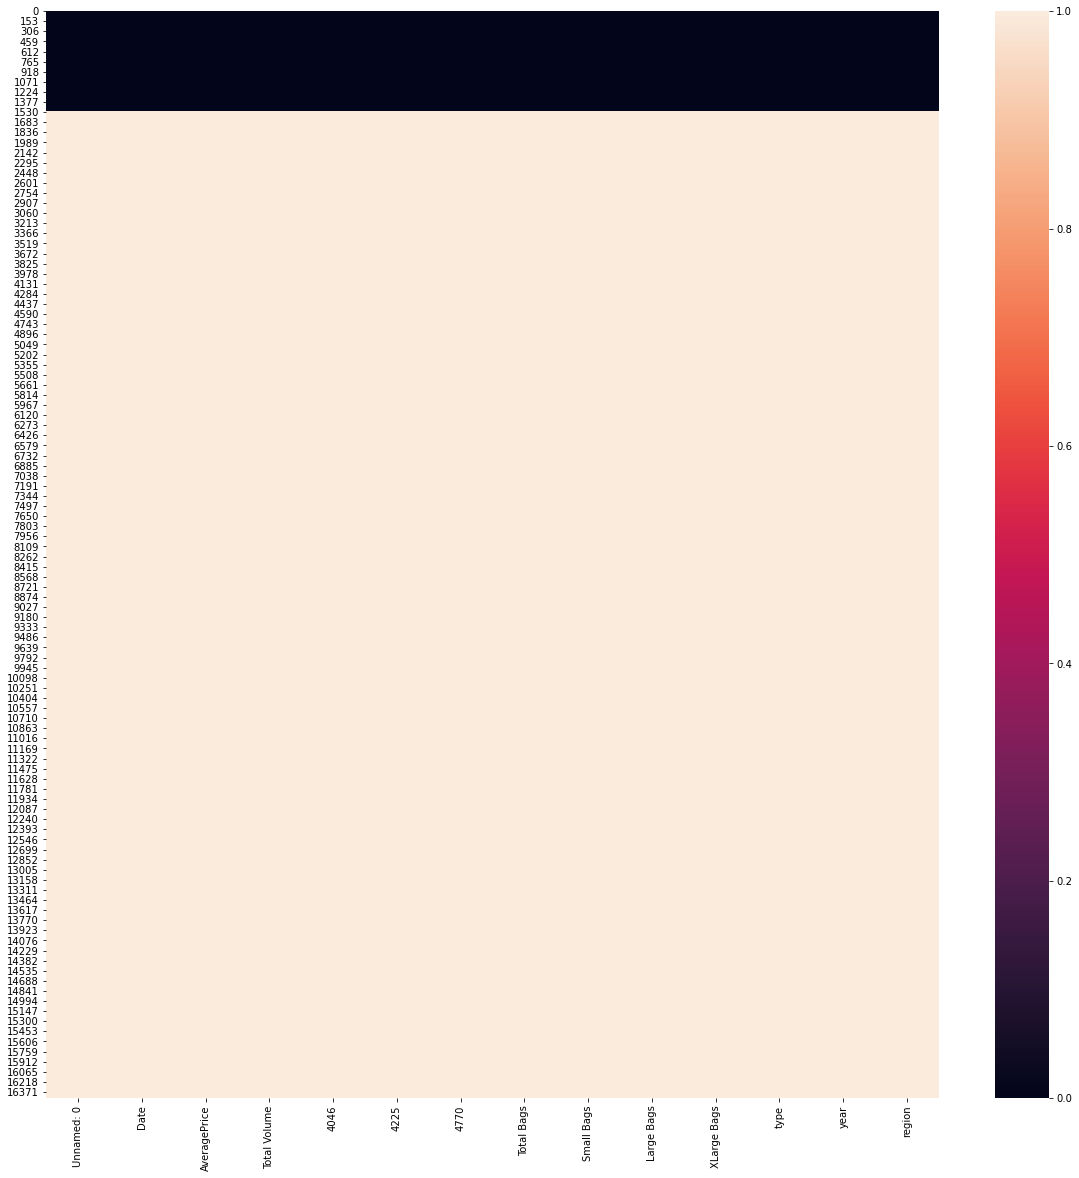

In [9]:
plt.figure(figsize=[20,20])
sns.heatmap(df.isnull())

In [10]:
df_new=df.dropna()

In [11]:
df_new.shape

(1517, 14)

In [12]:
df.shape

(16468, 14)

In [13]:
df_new.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,1517.000000,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000
mean,26.995386,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821
std,14.848287,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324
min,0.000000,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000
25%,14.000000,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000
50%,29.000000,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000
75%,39.000000,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000
max,51.000000,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000


In [14]:
obj_df = df_new.select_dtypes(include=['object']).copy()
obj_df.head()

,Date,type,region
0,27-12-2015,conventional,Albany
1,20-12-2015,conventional,Albany
2,13-12-2015,conventional,Albany
3,06-12-2015,conventional,Albany
4,29-11-2015,conventional,Albany


In [15]:
print(df_new["type"].value_counts())

conventional    1517
Name: type, dtype: int64


# Feature Extraction

In [16]:
df_new["Date"]=pd.to_datetime(df_new["Date"])

In [17]:
df_new.dtypes

Unnamed: 0             float64
Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                   float64
region                  object
dtype: object

In [18]:
#df_new["Year"]=df_new["Date"].dt.year

In [19]:
df_new["Month"]=df_new["Date"].dt.month

In [20]:
df_new['Day']=df_new['Date'].dt.day

In [21]:
df_new["Day"].dtype

dtype('int64')

In [22]:
df_new["Month"].dtype

dtype('int64')

# Label Encoder
Finally lets treat the object "Region" column for proceeding further in model building.

In [23]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df_new["region"]=LE.fit_transform(df_new["region"])
df_new.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,0.0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,0,12,27
1,1.0,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,0,12,20
2,2.0,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,0,12,13
3,3.0,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,0,6,12
4,4.0,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,0,11,29


# Outliers and Skewness Checking

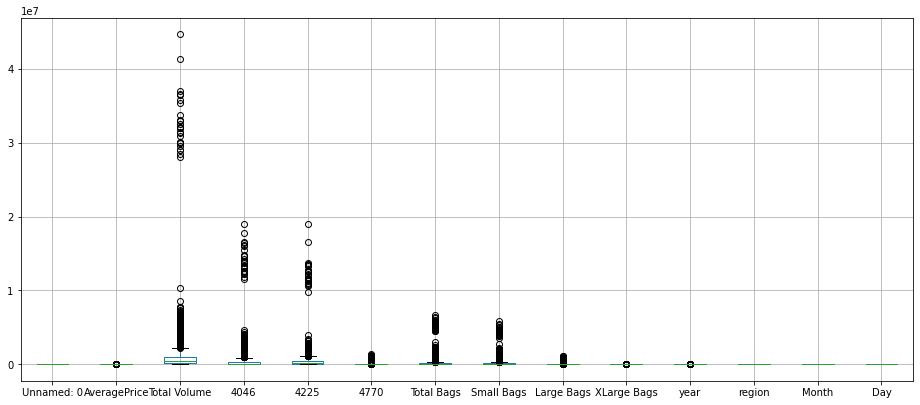

In [24]:
df_new.iloc[:,0:16].boxplot(figsize=[16,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [25]:
collist=df_new.columns.values
collist

array(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046',
       '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags',
       'XLarge Bags', 'type', 'year', 'region', 'Month', 'Day'],
      dtype=object)

Unnamed: 0         AxesSubplot(0.125,0.536818;0.0945122x0.343182)
AveragePrice    AxesSubplot(0.238415,0.536818;0.0945122x0.343182)
Total Volume    AxesSubplot(0.351829,0.536818;0.0945122x0.343182)
4046            AxesSubplot(0.465244,0.536818;0.0945122x0.343182)
4225            AxesSubplot(0.578659,0.536818;0.0945122x0.343182)
4770            AxesSubplot(0.692073,0.536818;0.0945122x0.343182)
Total Bags      AxesSubplot(0.805488,0.536818;0.0945122x0.343182)
Small Bags            AxesSubplot(0.125,0.125;0.0945122x0.343182)
Large Bags         AxesSubplot(0.238415,0.125;0.0945122x0.343182)
XLarge Bags        AxesSubplot(0.351829,0.125;0.0945122x0.343182)
year               AxesSubplot(0.465244,0.125;0.0945122x0.343182)
region             AxesSubplot(0.578659,0.125;0.0945122x0.343182)
Month              AxesSubplot(0.692073,0.125;0.0945122x0.343182)
Day                AxesSubplot(0.805488,0.125;0.0945122x0.343182)
dtype: object

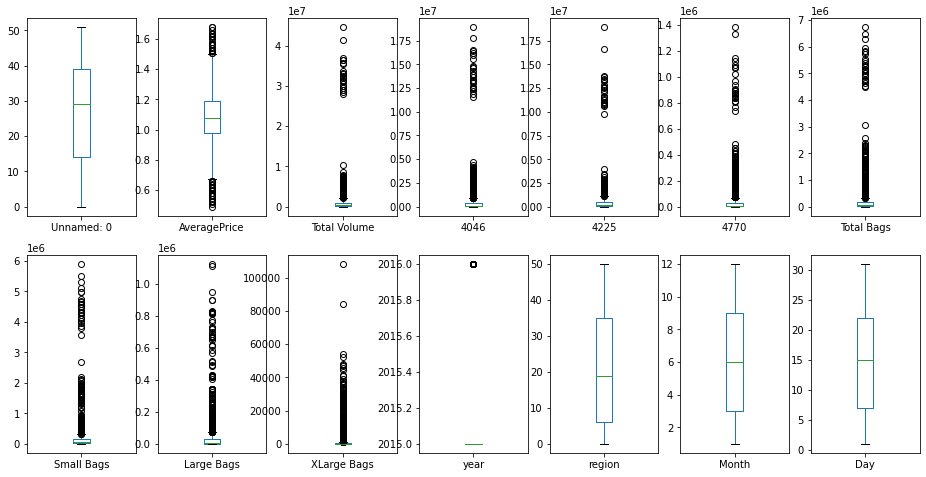

In [26]:
df_new.plot(kind='box',subplots=True,layout=(2,7),figsize=[16,8])

In [27]:
df_new.skew()

Unnamed: 0     -0.234824
AveragePrice   -0.109444
Total Volume    6.200138
4046            6.051830
4225            6.394926
4770            5.405164
Total Bags      5.366378
Small Bags      5.355185
Large Bags      5.144495
XLarge Bags     5.775077
year            1.828332
region          0.288146
Month           0.101439
Day             0.041303
dtype: float64

# EDA

<AxesSubplot:xlabel='AveragePrice', ylabel='count'>

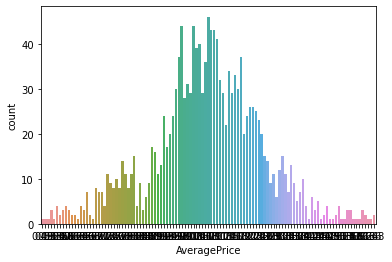

In [28]:
sns.countplot(df_new['AveragePrice'])

<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

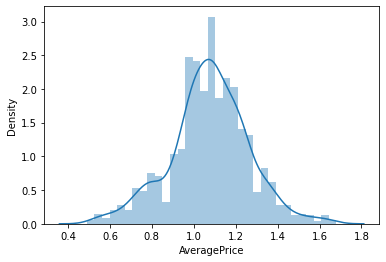

In [29]:
sns.distplot(df_new["AveragePrice"])

<AxesSubplot:xlabel='Month', ylabel='count'>

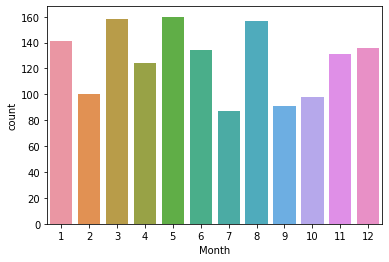

In [30]:
sns.countplot(df_new['Month'])

<AxesSubplot:xlabel='year', ylabel='count'>

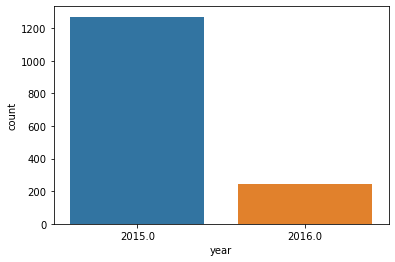

In [31]:
sns.countplot(df_new['year'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
 [Text(0, 0, 'Albany'),
  Text(1, 0, 'Atlanta'),
  Text(2, 0, 'BaltimoreWashington'),
  Text(3, 0, 'Boise'),
  Text(4, 0, 'Boston'),
  Text(5, 0, 'BuffaloRochester'),
  Text(6, 0, 'California'),
  Text(7, 0, 'Charlotte'),
  Text(8, 0, 'Chicago'),
  Text(9, 0, 'Columbus'),
  Text(10, 0, 'DallasFtWorth'),
  Text(11, 0, 'Denver'),
  Text(12, 0, 'Detroit'),
  Text(13, 0, 'GrandRapids'),
  Text(14, 0, 'GreatLakes'),
  Text(15, 0, 'HarrisburgScranton'),
  Text(16, 0, 'HartfordSpringfield'),
  Text(17, 0, 'Houston'),
  Text(18, 0, 'Indianapolis'),
  Text(19, 0, 'Jacksonville'),
  Text(20, 0, 'LasVegas'),
  Text(21, 0, 'LosAngeles'),
  Text(22, 0, 'Louisville'),
  Text(23, 0, 'MiamiFtLauderdale'),
  Text(24, 0, 'Midsouth'),
  Text(25, 0, 'Nashville'),
  Text(26, 0, 'N

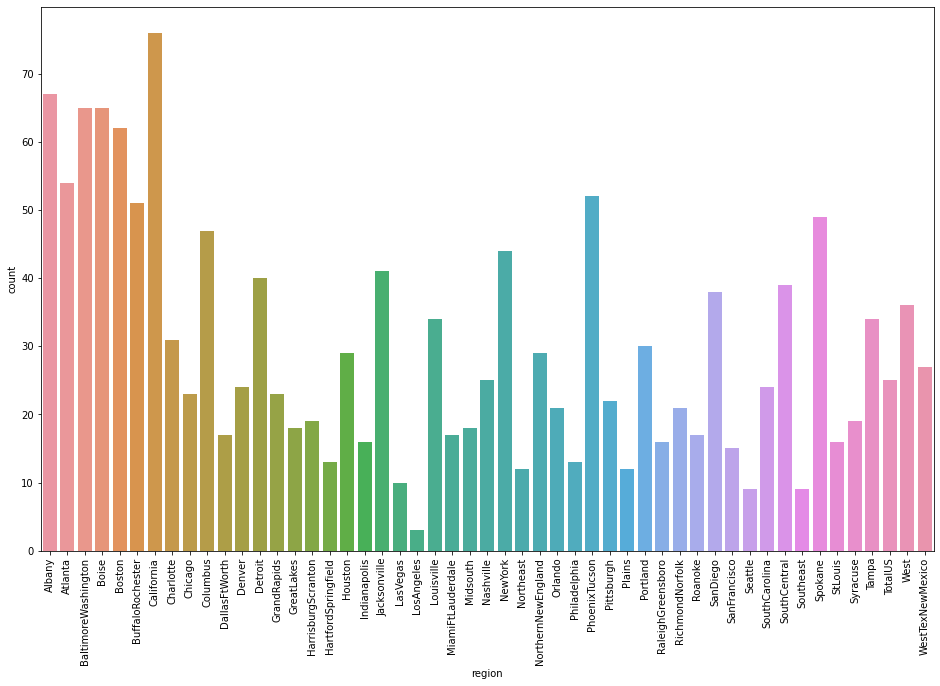

In [32]:
plt.subplots(figsize=(16,10))
sns.countplot(df['region'])
plt.xticks(rotation=90)

<AxesSubplot:ylabel='Density'>

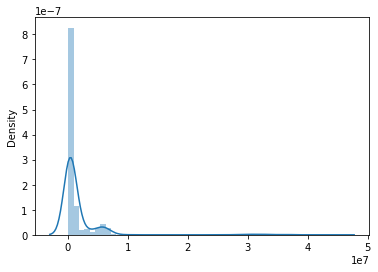

In [33]:
sns.distplot(x = df_new['Total Volume'])

<AxesSubplot:ylabel='Density'>

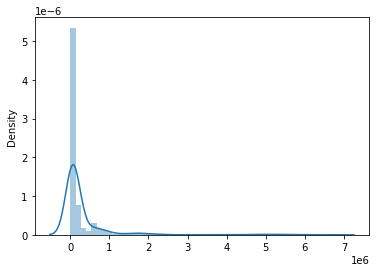

In [34]:
sns.distplot(x = df_new['Total Bags'])

# Bivariate Analysis:

<AxesSubplot:xlabel='year'>

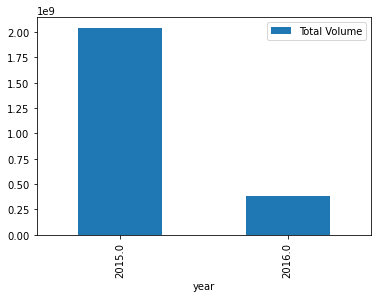

In [35]:
df.groupby(df["year"]).sum()[['Total Volume']].plot(kind='bar')

<AxesSubplot:xlabel='region'>

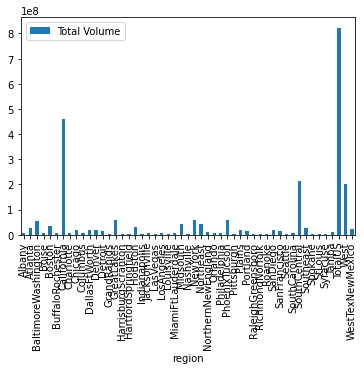

In [36]:
df.groupby(df["region"]).sum()[['Total Volume']].plot(kind='bar')

<AxesSubplot:xlabel='AveragePrice', ylabel='count'>

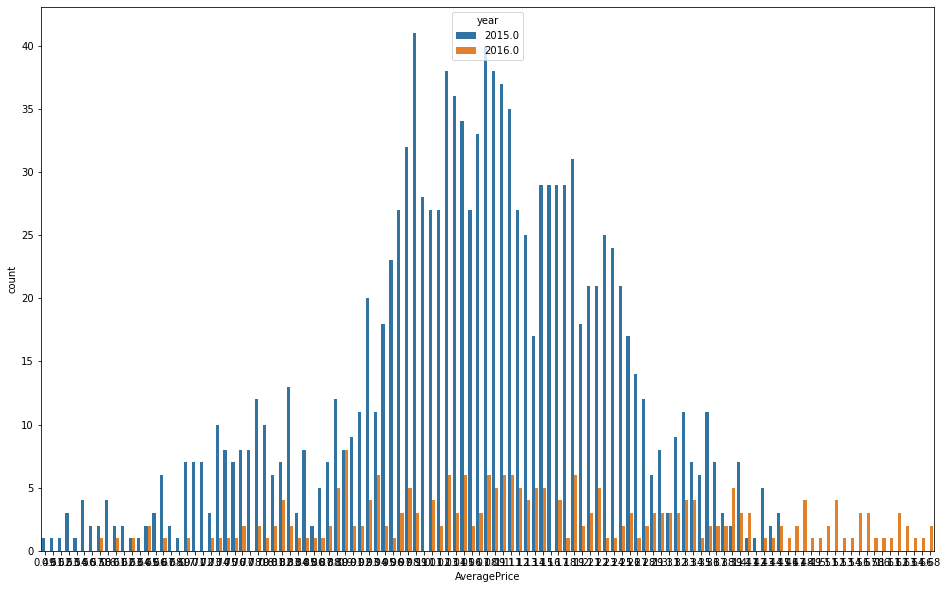

In [37]:
plt.subplots(figsize=(16,10))
sns.countplot(x='AveragePrice',data=df_new,hue='year')

<AxesSubplot:xlabel='year'>

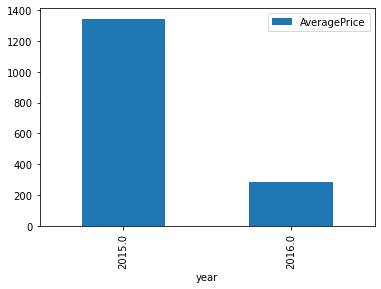

In [38]:
df.groupby(df["year"]).sum()[['AveragePrice']].plot(kind='bar')

<AxesSubplot:title={'center':'Comparision between AveragePrice and 4046 small type'}, xlabel='AveragePrice', ylabel='4046'>

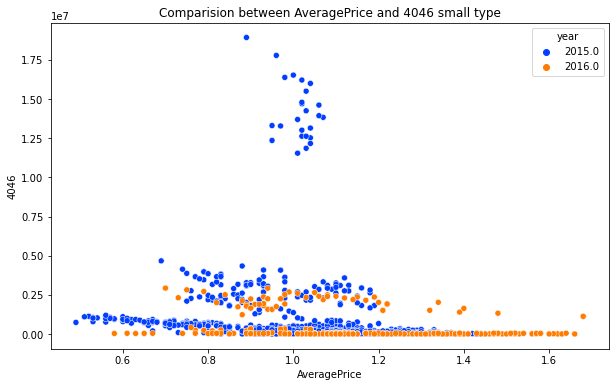

In [39]:
plt.figure(figsize=[10,6])
plt.title('Comparision between AveragePrice and 4046 small type')
sns.scatterplot(df_new['AveragePrice'],df_new['4046'],hue=df_new['year'],palette='bright')

<AxesSubplot:title={'center':'Comparision between AveragePrice and 4225 Large type'}, xlabel='AveragePrice', ylabel='4225'>

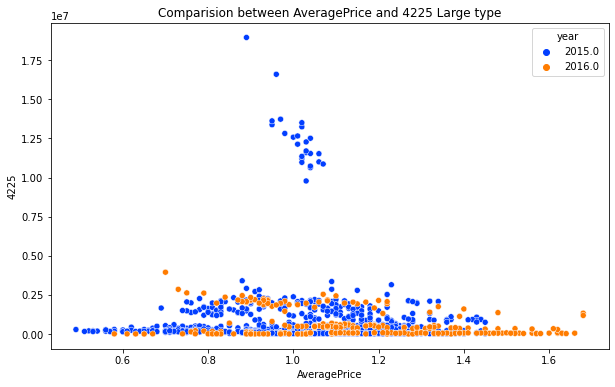

In [40]:
plt.figure(figsize=[10,6])
plt.title('Comparision between AveragePrice and 4225 Large type')
sns.scatterplot(df_new['AveragePrice'],df_new['4225'],hue=df_new['year'],palette='bright')

<AxesSubplot:title={'center':'Comparision between AveragePrice and 4770 ExtraLarge type'}, xlabel='AveragePrice', ylabel='4770'>

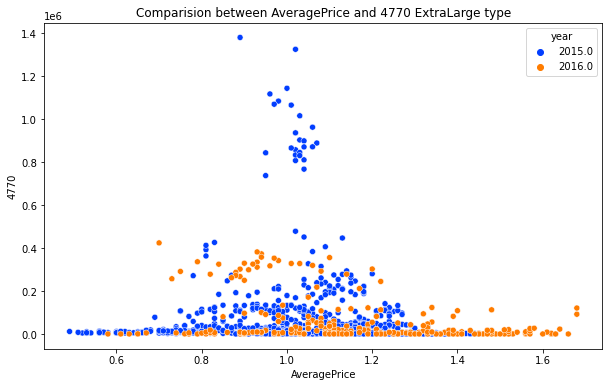

In [41]:
plt.figure(figsize=[10,6])
plt.title('Comparision between AveragePrice and 4770 ExtraLarge type')
sns.scatterplot(df_new['AveragePrice'],df_new['4770'],hue=df_new['year'],palette='bright')

<AxesSubplot:title={'center':'Comparision between Total Volumne sold and 4046 small type'}, xlabel='Total Volume', ylabel='4046'>

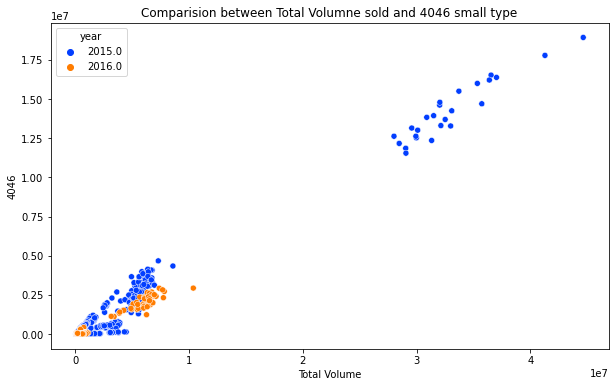

In [42]:
plt.figure(figsize=[10,6])
plt.title('Comparision between Total Volumne sold and 4046 small type')
sns.scatterplot(df_new['Total Volume'],df_new['4046'],hue=df_new['year'],palette='bright')

<AxesSubplot:title={'center':'Comparision between Total Volumne sold and 4225 Large type'}, xlabel='Total Volume', ylabel='4225'>

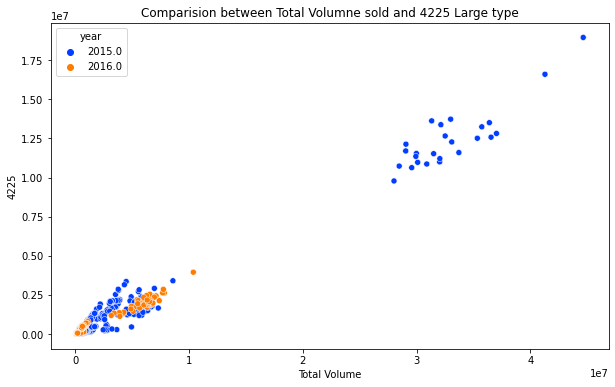

In [43]:
plt.figure(figsize=[10,6])
plt.title('Comparision between Total Volumne sold and 4225 Large type')
sns.scatterplot(df_new['Total Volume'],df_new['4225'],hue=df_new['year'],palette='bright')

<AxesSubplot:title={'center':'Comparision between Total Volumne sold and 4770 ExtraLarge type'}, xlabel='Total Volume', ylabel='4770'>

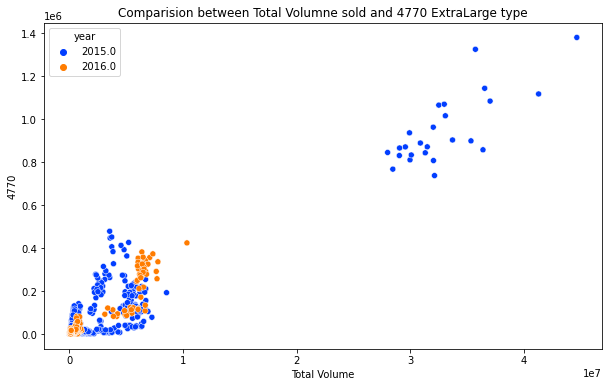

In [44]:
plt.figure(figsize=[10,6])
plt.title('Comparision between Total Volumne sold and 4770 ExtraLarge type')
sns.scatterplot(df_new['Total Volume'],df_new['4770'],hue=df_new['year'],palette='bright')

<AxesSubplot:title={'center':'Comparision between Total Bags sold and 4046 small type'}, xlabel='Total Bags', ylabel='4046'>

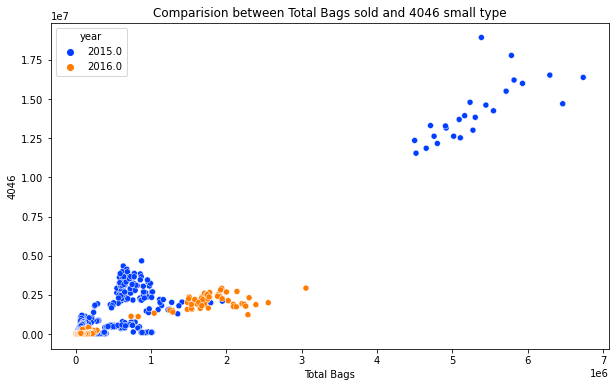

In [45]:
plt.figure(figsize=[10,6])
plt.title('Comparision between Total Bags sold and 4046 small type')
sns.scatterplot(df_new['Total Bags'],df_new['4046'],hue=df_new['year'],palette='bright')

<AxesSubplot:title={'center':'Comparision between Total Bags sold and 4225 Large type'}, xlabel='Total Bags', ylabel='4225'>

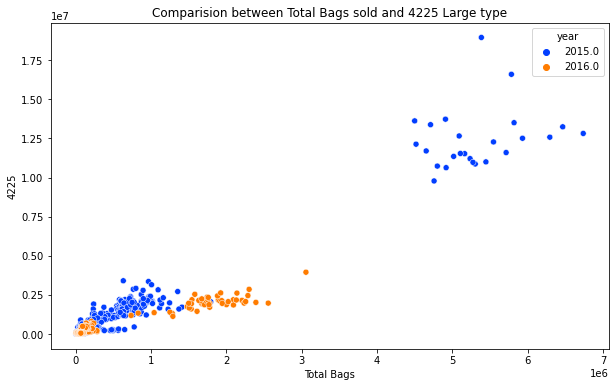

In [46]:
plt.figure(figsize=[10,6])
plt.title('Comparision between Total Bags sold and 4225 Large type')
sns.scatterplot(df_new['Total Bags'],df_new['4225'],hue=df_new['year'],palette='bright')

<AxesSubplot:title={'center':'Comparision between Total Bags sold and 4770 ExtraLarge type'}, xlabel='Total Bags', ylabel='4770'>

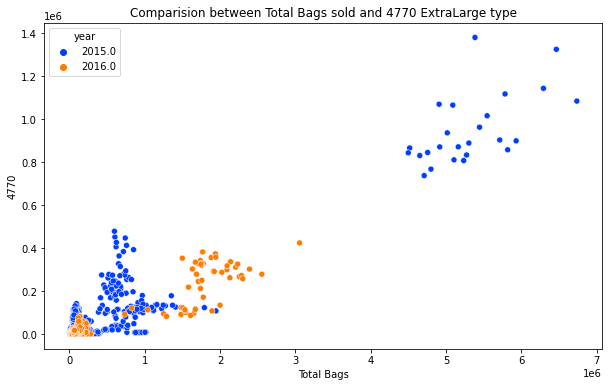

In [47]:
plt.figure(figsize=[10,6])
plt.title('Comparision between Total Bags sold and 4770 ExtraLarge type')
sns.scatterplot(df_new['Total Bags'],df_new['4770'],hue=df_new['year'],palette='bright')

<AxesSubplot:title={'center':'Comparision between XLarge Bags sold and 4770 ExtraLarge type'}, xlabel='XLarge Bags', ylabel='4770'>

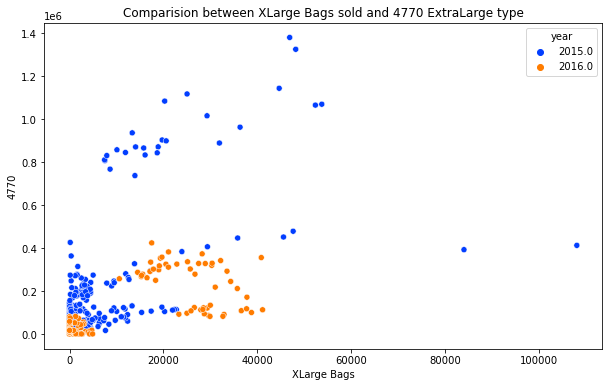

In [48]:
plt.figure(figsize=[10,6])
plt.title('Comparision between XLarge Bags sold and 4770 ExtraLarge type')
sns.scatterplot(df_new['XLarge Bags'],df_new['4770'],hue=df_new['year'],palette='bright')


<AxesSubplot:title={'center':'Comparision between XLarge Bags sold and 4046 small type'}, xlabel='XLarge Bags', ylabel='4046'>

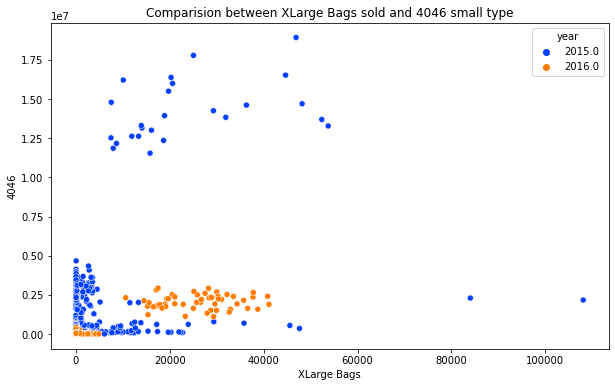

In [49]:
plt.figure(figsize=[10,6])
plt.title('Comparision between XLarge Bags sold and 4046 small type')
sns.scatterplot(df_new['XLarge Bags'],df_new['4046'],hue=df_new['year'],palette='bright')


# Multivariate Analysis

In [50]:
corr_mat=df_new.corr()
corr_mat

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,Month,Day
Unnamed: 0,1.000000,-0.075531,0.091934,0.092013,0.093566,0.075647,0.081007,0.083485,0.065364,-0.050993,-0.012854,0.012123,-0.598729,-0.261166
AveragePrice,-0.075531,1.000000,-0.140470,-0.190096,-0.092084,-0.100567,-0.111597,-0.097682,-0.177480,-0.048284,0.178683,-0.229408,0.060642,0.092589
Total Volume,0.091934,-0.140470,1.000000,0.985568,0.987154,0.934347,0.967689,0.960642,0.910226,0.521717,-0.004189,0.236579,-0.055212,-0.034857
4046,0.092013,-0.190096,0.985568,1.000000,0.951952,0.898570,0.930395,0.922278,0.884229,0.474063,-0.040439,0.269481,-0.053007,-0.031806
4225,0.093566,-0.092084,0.987154,0.951952,1.000000,0.927757,0.951779,0.943988,0.900496,0.504718,-0.007254,0.215733,-0.058429,-0.044008
4770,0.075647,-0.100567,0.934347,0.898570,0.927757,1.000000,0.926405,0.923607,0.840523,0.646053,0.029222,0.138092,-0.055079,-0.021318
Total Bags,0.081007,-0.111597,0.967689,0.930395,0.951779,0.926405,1.000000,0.997341,0.911336,0.601856,0.090108,0.190001,-0.047747,-0.021137
Small Bags,0.083485,-0.097682,0.960642,0.922278,0.943988,0.923607,0.997341,1.000000,0.879131,0.611300,0.106382,0.168650,-0.048978,-0.016462
Large Bags,0.065364,-0.177480,0.910226,0.884229,0.900496,0.840523,0.911336,0.879131,1.000000,0.447779,-0.018678,0.297452,-0.039242,-0.046578
XLarge Bags,-0.050993,-0.048284,0.521717,0.474063,0.504718,0.646053,0.601856,0.611300,0.447779,1.000000,0.218342,-0.046144,0.021452,0.019315


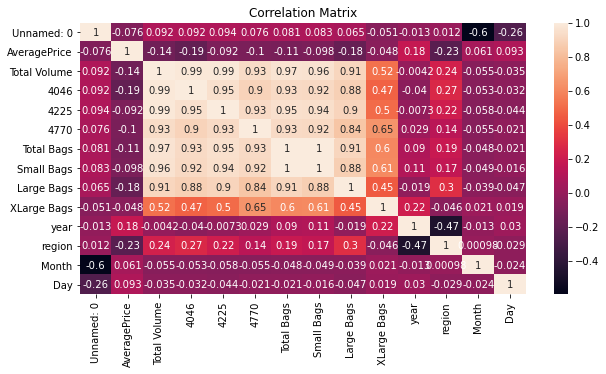

In [51]:
plt.figure(figsize=[10,5])
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show()

# Unwanted column Removals:

In [52]:
column_drop1=["Unnamed: 0","type","Date"]
df_column_dropped=df_new.copy()


In [53]:
df_column_dropped.drop(column_drop1,axis=1,inplace=True)

In [54]:
df_column_dropped

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,2015.0,0,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,2015.0,0,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,2015.0,0,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,2015.0,0,6,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,2015.0,0,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,2016.0,7,10,16
1513,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,2016.0,7,9,10
1514,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,2016.0,7,2,10
1515,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,2016.0,7,9,25


In [55]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df_column_dropped["region"]=LE.fit_transform(df_column_dropped["region"])
#df_column_dropped["year"]=LE.fit_transform(df_column_dropped["year"])
df_column_dropped.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015.0,0,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015.0,0,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015.0,0,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015.0,0,6,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015.0,0,11,29


# Outliers and Skewness Removals:

AveragePrice       AxesSubplot(0.125,0.536818;0.0945122x0.343182)
Total Volume    AxesSubplot(0.238415,0.536818;0.0945122x0.343182)
4046            AxesSubplot(0.351829,0.536818;0.0945122x0.343182)
4225            AxesSubplot(0.465244,0.536818;0.0945122x0.343182)
4770            AxesSubplot(0.578659,0.536818;0.0945122x0.343182)
Total Bags      AxesSubplot(0.692073,0.536818;0.0945122x0.343182)
Small Bags      AxesSubplot(0.805488,0.536818;0.0945122x0.343182)
Large Bags            AxesSubplot(0.125,0.125;0.0945122x0.343182)
XLarge Bags        AxesSubplot(0.238415,0.125;0.0945122x0.343182)
year               AxesSubplot(0.351829,0.125;0.0945122x0.343182)
region             AxesSubplot(0.465244,0.125;0.0945122x0.343182)
Month              AxesSubplot(0.578659,0.125;0.0945122x0.343182)
Day                AxesSubplot(0.692073,0.125;0.0945122x0.343182)
dtype: object

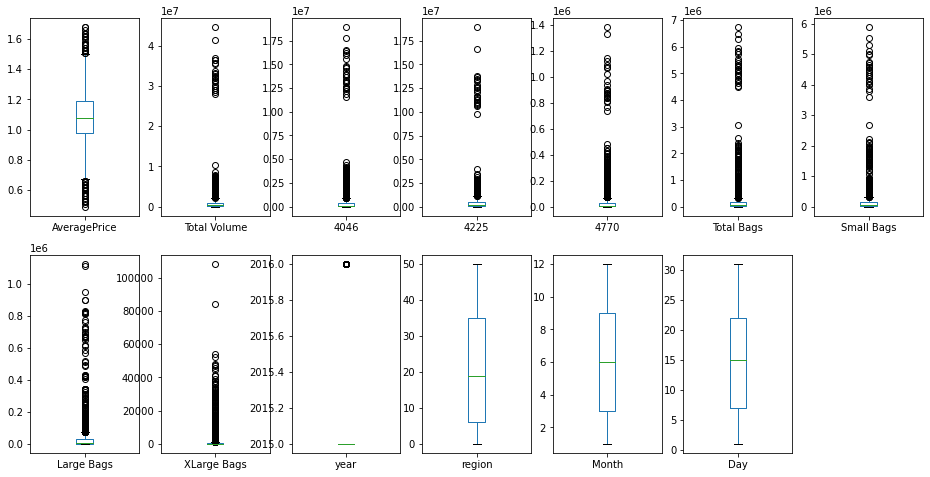

In [56]:
df_column_dropped.plot(kind='box',subplots=True,layout=(2,7),figsize=[16,8])

In [57]:
from scipy.stats import zscore
z=np.abs(zscore(df_column_dropped))
df_zscores=df_column_dropped[(z<3).all(axis=1)]

In [58]:
df_zscores.shape

(1436, 13)

In [59]:
df_column_dropped.shape

(1517, 13)

In [60]:
((1517-1486)/1517)*100

2.0435069215557022

AveragePrice       AxesSubplot(0.125,0.536818;0.0945122x0.343182)
Total Volume    AxesSubplot(0.238415,0.536818;0.0945122x0.343182)
4046            AxesSubplot(0.351829,0.536818;0.0945122x0.343182)
4225            AxesSubplot(0.465244,0.536818;0.0945122x0.343182)
4770            AxesSubplot(0.578659,0.536818;0.0945122x0.343182)
Total Bags      AxesSubplot(0.692073,0.536818;0.0945122x0.343182)
Small Bags      AxesSubplot(0.805488,0.536818;0.0945122x0.343182)
Large Bags            AxesSubplot(0.125,0.125;0.0945122x0.343182)
XLarge Bags        AxesSubplot(0.238415,0.125;0.0945122x0.343182)
year               AxesSubplot(0.351829,0.125;0.0945122x0.343182)
region             AxesSubplot(0.465244,0.125;0.0945122x0.343182)
Month              AxesSubplot(0.578659,0.125;0.0945122x0.343182)
Day                AxesSubplot(0.692073,0.125;0.0945122x0.343182)
dtype: object

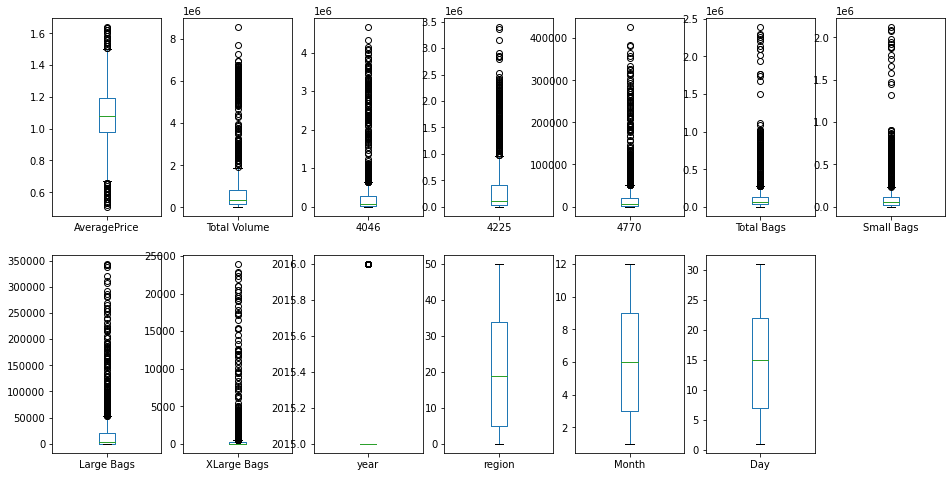

In [61]:
df_zscores.plot(kind='box',subplots=True,layout=(2,7),figsize=[16,8])

In [62]:
x=df_zscores.drop("AveragePrice",axis=1)
y=df_zscores["AveragePrice"]

In [63]:
df_zscores.skew()

AveragePrice   -0.184770
Total Volume    2.704085
4046            3.120756
4225            2.367429
4770            3.331191
Total Bags      4.165747
Small Bags      4.410267
Large Bags      3.518056
XLarge Bags     5.118965
year            2.004439
region          0.276276
Month           0.111898
Day             0.041849
dtype: float64

In [64]:
from sklearn.preprocessing import power_transform
df_skew=power_transform(x)
df_skew=pd.DataFrame(df_skew,columns=x.columns)

In [65]:
df_skew.skew()

Total Volume    0.000000
4046           -0.025799
4225            0.000835
4770           -0.054751
Total Bags     -0.000866
Small Bags      0.013734
Large Bags     -0.118018
XLarge Bags     0.479994
year            2.004439
region         -0.219708
Month          -0.136692
Day            -0.212755
dtype: float64

In [66]:
x=df_skew.copy()

In [67]:
collist=df_skew.columns.values

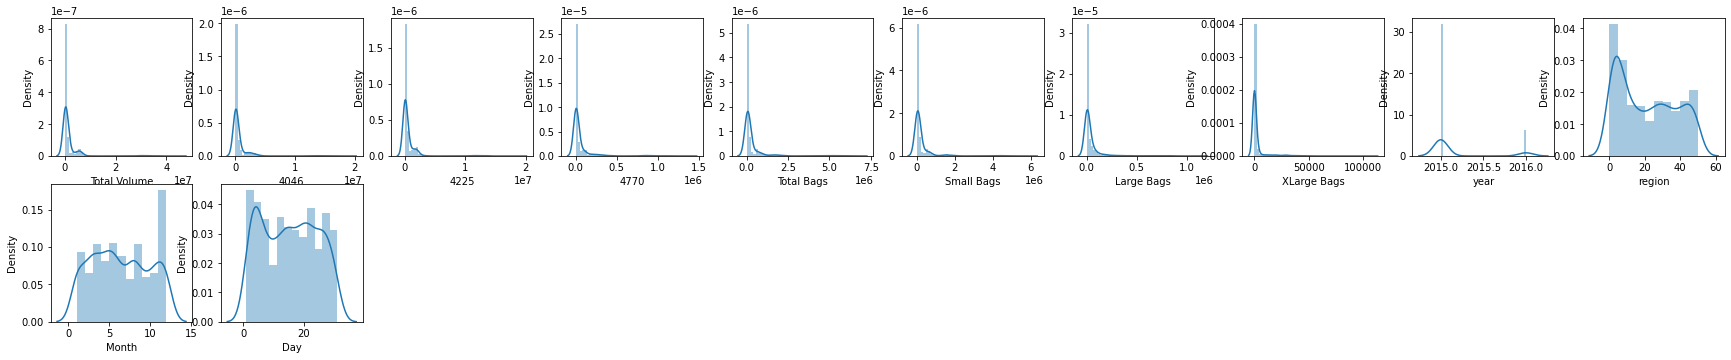

In [68]:
plt.figure(figsize=(30,30))
for i in range(0,len(collist)):
    plt.subplot(10,10,i+1)
    sns.distplot(df_column_dropped[collist[i]])

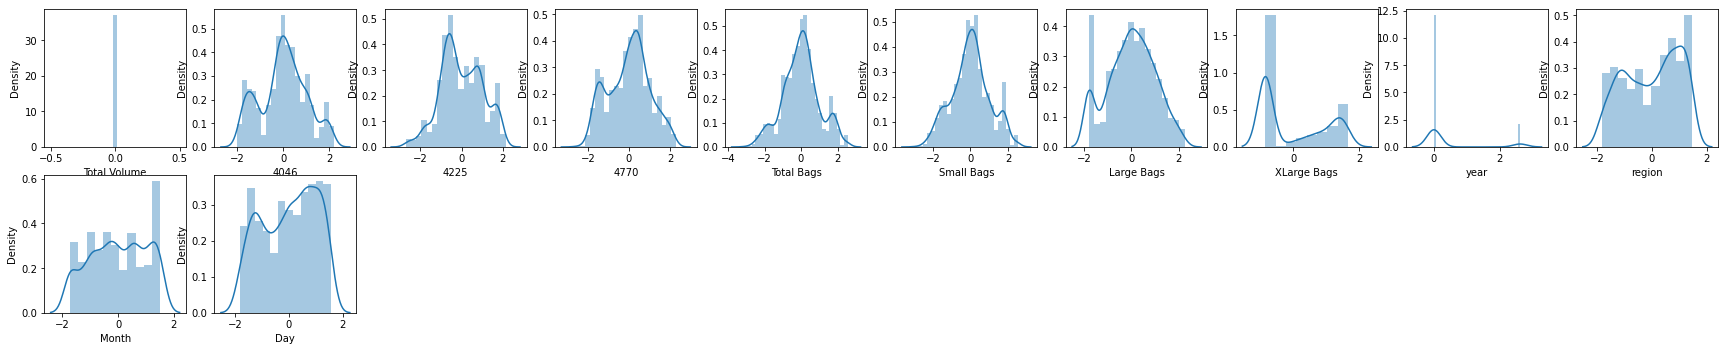

In [69]:
plt.figure(figsize=(30,30))
for i in range(0,len(collist)):
    plt.subplot(10,10,i+1)
    sns.distplot(df_skew[collist[i]])

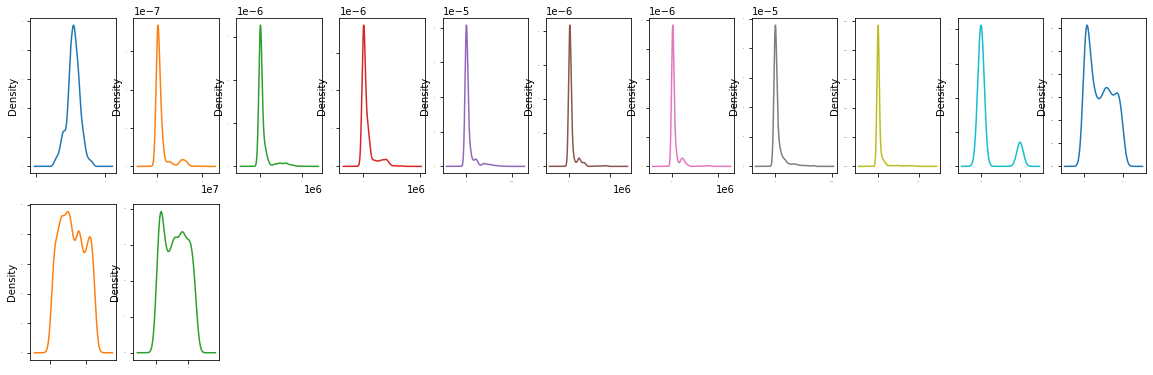

In [70]:
df_zscores.plot(kind='density', subplots=True, layout=(6,11), sharex=False, legend=False,fontsize=1,figsize=(20,20))
plt.show()

# Lets start for the process of Model Building:

# Finding the RandomState:

In [71]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=i)
    lr=RandomForestRegressor()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=(r2_score(y_test,pred))
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is  "  ,maxAccu , "  at random_state:", maxRS)


Best accuracy is   0.8719589061452058   at random_state: 138


In [72]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=maxRS)

In [73]:
x_test.shape

(288, 12)

In [74]:
x_train.shape

(1148, 12)

In [75]:
y_test.shape

(288,)

In [76]:
y_train.shape

(1148,)

# Now lets start with different models for checking Scores:

In [77]:
lm=LinearRegression()
lm.fit(x_train,y_train)
pred=lm.predict(x_test)
print("Coefficient : ",lm.coef_)
print("Intercept   : ",lm.intercept_)
print("Score       : ",lm.score(x_train,y_train))
print(' ')
print("error")
print("Mean absolute error    :",mean_absolute_error(y_test,pred))
print("Mean squared error     :",mean_squared_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))
print(' ')
from sklearn.metrics import r2_score
print("r2 score : ",r2_score(y_test,pred))

Coefficient :  [ 0.00000000e+00 -1.17140656e-01 -2.20390839e-02 -1.41003467e-02
 -1.81966579e-01  2.22689610e-01  4.01361606e-02  3.23849114e-03
  1.02969462e-04 -6.48870103e-03  6.81529976e-03  1.45156977e-02]
Intercept   :  1.0779435916376858
Score       :  0.3497521804312349
 
error
Mean absolute error    : 0.11368003882491592
Mean squared error     : 0.021532992220169498
Root mean squared error: 0.14674124239684458
 
r2 score :  0.42132288924083916


In [78]:
ls=Lasso(alpha=0.0001) 
ls.fit(x_train,y_train)
pred=ls.predict(x_test)
print("Coefficient : ",ls.coef_)
print("Intercept   : ",ls.intercept_)
print("Score       : ",ls.score(x_train,y_train))
print(' ')
print("error")
print("Mean absolute error    :",mean_absolute_error(y_test,pred))
print("Mean squared error     :",mean_squared_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))
print(' ')
#r2 score ------> coefficient of determination
#i.e. change coming in y whenever x is being changed.
from sklearn.metrics import r2_score
print("r2 score : ",r2_score(y_test,pred))

Coefficient :  [ 0.         -0.11706259 -0.02164324 -0.01346679 -0.16951261  0.21110588
  0.03762677  0.00263596  0.         -0.00667195  0.00670008  0.01442065]
Intercept   :  1.0779651851352317
Score       :  0.3496702631228522
 
error
Mean absolute error    : 0.113656919956381
Mean squared error     : 0.02152825804804514
Root mean squared error: 0.14672511048912226
 
r2 score :  0.4214501152677075


In [79]:
rd=Ridge(alpha=0.0001)# to minimize the coefficient varience
rd.fit(x_train,y_train)
pred=rd.predict(x_test)
rd.score(x_train,y_train)
print("Coefficient : ",rd.coef_)
print("Intercept   : ",rd.intercept_)
print("Score       : ",rd.score(x_train,y_train))
print(' ')
print("error")
print("Mean absolute error    :",mean_absolute_error(y_test,pred))
print("Mean squared error     :",mean_squared_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))
print(' ')
#r2 score ------> coefficient of determination
#i.e. change coming in y whenever x is being changed.
from sklearn.metrics import r2_score
print("r2 score : ",r2_score(y_test,pred))

Coefficient :  [ 0.00000000e+00 -1.17140649e-01 -2.20390501e-02 -1.41002724e-02
 -1.81964614e-01  2.22687804e-01  4.01357896e-02  3.23841764e-03
  1.02955757e-04 -6.48874055e-03  6.81529565e-03  1.45156971e-02]
Intercept   :  1.0779435930264067
Score       :  0.3497521804292908
 
error
Mean absolute error    : 0.11368003481890192
Mean squared error     : 0.021532990881377556
Root mean squared error: 0.1467412378351006
 
r2 score :  0.4213229252195013


In [80]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
rf.score(x_train,y_train)
print("Score       : ",rf.score(x_train,y_train))
print(' ')
print("error")
print("Mean absolute error    :",mean_absolute_error(y_test,pred))
print("Mean squared error     :",mean_squared_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))
print(' ')
#r2 score ------> coefficient of determination
#i.e. change coming in y whenever x is being changed.
from sklearn.metrics import r2_score
acc=r2_score(y_test,pred)
print("r2 score : ",acc)

Score       :  0.9738311107241182
 
error
Mean absolute error    : 0.052675000000000013
Mean squared error     : 0.004898555416666669
Root mean squared error: 0.06998968078700366
 
r2 score :  0.8683563405203333


In [81]:
from sklearn.neighbors import KNeighborsRegressor
kn=KNeighborsRegressor()
kn.fit(x_train,y_train)
pred=kn.predict(x_test)
kn.score(x_train,y_train)
#print("Coefficient : ",rf.coef_)
# print("Intercept   : ",rf.intercept_)
print("Score       : ",kn.score(x_train,y_train))
print(' ')
print("error")
print("Mean absolute error    :",mean_absolute_error(y_test,pred))
print("Mean squared error     :",mean_squared_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))
print(' ')
#r2 score ------> coefficient of determination
#i.e. change coming in y whenever x is being changed.
from sklearn.metrics import r2_score
print("r2 score : ",r2_score(y_test,pred))

Score       :  0.7959040302073687
 
error
Mean absolute error    : 0.07215277777777777
Mean squared error     : 0.008487583333333333
Root mean squared error: 0.0921280811334597
 
r2 score :  0.7719048913201958


In [82]:
ab=AdaBoostRegressor()
ab.fit(x_train,y_train)
pred=ab.predict(x_test)
ab.score(x_train,y_train)
#print("Coefficient : ",rf.coef_)
# print("Intercept   : ",rf.intercept_)
print("Score       : ",ab.score(x_train,y_train))
print(' ')
print("error")
print("Mean absolute error    :",mean_absolute_error(y_test,pred))
print("Mean squared error     :",mean_squared_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))
print(' ')
#r2 score ------> coefficient of determination
#i.e. change coming in y whenever x is being changed.
from sklearn.metrics import r2_score
print("r2 score : ",r2_score(y_test,pred))

Score       :  0.6309902797875881
 
error
Mean absolute error    : 0.08981520929558567
Mean squared error     : 0.012398836771355348
Root mean squared error: 0.11135006408330149
 
r2 score :  0.666793961272983


In [83]:
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
pred=dt.predict(x_test)
dt.score(x_train,y_train)
#print("Coefficient : ",rf.coef_)
# print("Intercept   : ",rf.intercept_)
print("Score       : ",dt.score(x_train,y_train))
print(' ')
print("error")
print("Mean absolute error    :",mean_absolute_error(y_test,pred))
print("Mean squared error     :",mean_squared_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))
print(' ')
#r2 score ------> coefficient of determination
#i.e. change coming in y whenever x is being changed.
from sklearn.metrics import r2_score
print("r2 score : ",r2_score(y_test,pred))

Score       :  1.0
 
error
Mean absolute error    : 0.08309027777777778
Mean squared error     : 0.01538784722222222
Root mean squared error: 0.12404776185898002
 
r2 score :  0.5864673668985869


In [84]:
#Pridict the value
pred=lm.predict(x_test)
print("Predicted Price : ", pred )
print("Actual Price :", y_test)

Predicted Price :  [1.12133011 1.1068896  1.05197242 1.29913271 0.9867509  0.94384983
 1.08750614 0.9832357  1.13893626 0.9641132  1.1922735  0.91058379
 0.94416647 0.88990259 0.93233009 1.09633759 1.03274458 0.93576761
 1.10796604 0.9517048  1.11739459 1.03271637 1.09553309 0.99820829
 0.90869672 1.16301493 1.13753606 1.24136704 0.9117378  1.21681804
 1.04596233 0.97246908 1.21219617 1.0003909  1.21195617 1.13887689
 0.9670327  1.09103355 1.20585861 1.10643169 1.05171607 0.97023356
 1.03447761 0.99801416 1.26392517 1.02130283 1.08109621 0.94878616
 1.29611146 1.24473587 1.02226145 1.03398381 1.01786147 1.05578126
 0.99779787 1.02409962 0.89061958 1.05731473 1.1202015  0.99303634
 1.20725475 1.01789095 0.91288238 1.12957701 1.21561456 1.05175122
 1.08883476 0.92262093 1.07149241 1.09156033 0.91353537 0.92012833
 0.85251266 1.23173349 1.19563133 1.19758061 0.96429097 1.02057535
 0.89697557 1.07494094 1.10783452 0.85025814 1.17526648 0.96749166
 1.03249704 1.19770139 1.19537678 1.0429607

# CrossValidation Checking:

In [85]:
from sklearn.model_selection import KFold
cv1 = KFold(n_splits=10, shuffle=True)
scr=cross_val_score(lm,x,y,cv=cv1,scoring="r2")
print("Cross Validation Score of LinearRegression Model is : ", scr.mean())

Cross Validation Score of LinearRegression Model is :  0.34254882030398576


In [86]:
cv1 = KFold(n_splits=10, shuffle=True)
scr=cross_val_score(ls,x,y,cv=cv1,scoring="r2")
print("Cross Validation Score of Lasso Model is : ", scr.mean())

Cross Validation Score of Lasso Model is :  0.33760110212216426


In [87]:
cv1 = KFold(n_splits=10, shuffle=True)
scr=cross_val_score(rd,x,y,cv=cv1,scoring="r2")
print("Cross Validation Score of RidgeRegression Model is : ", scr.mean())

Cross Validation Score of RidgeRegression Model is :  0.3505307558282848


In [88]:
cv1 = KFold(n_splits=10, shuffle=True)
scr=cross_val_score(rf,x,y,cv=cv1,scoring="r2")
print("Cross Validation Score of RandomForestRegressor Model is : ", scr.mean())

Cross Validation Score of RandomForestRegressor Model is :  0.8184864326211729


In [89]:
cv1 = KFold(n_splits=10, shuffle=True)
scr=cross_val_score(kn,x,y,cv=cv1,scoring="r2")
print("Cross Validation Score of Kneigbour Model is : ", scr.mean())

Cross Validation Score of Kneigbour Model is :  0.7062217984577803


In [90]:
cv1 = KFold(n_splits=10, shuffle=True)
scr=cross_val_score(ab,x,y,cv=cv1,scoring="r2")
print("Cross Validation Score of AdaBoost Model is : ", scr.mean())

Cross Validation Score of AdaBoost Model is :  0.5954443205027333


In [93]:
cv1 = KFold(n_splits=10, shuffle=True)
scr=cross_val_score(dt,x,y,cv=cv1,scoring="r2")
print("Cross Validation Score of DecisionTree Model is : ", scr.mean())

Cross Validation Score of DecisionTree Model is :  0.6506996906073281


# Obsevation: RF Random Forest Regressor is the one having least Difference of R2score and CrossValidation.
So lets select Randomforest for Furter Process of ParameterTuning.

From this lets take some models which is Robust and performs good.
So lets go with Parameter tuning of any 3 models for checking atleast 3 models.

# Parameter Tuning:

# 1St Tuning: RandomForestRegressor:

In [91]:
from sklearn.model_selection import GridSearchCV
#RandomForestRegressor: 
parameters={"bootstrap":[True,False], "criterion":["mse", "mae"],}

In [92]:
gcv=GridSearchCV(RandomForestRegressor(), parameters,cv=5,scoring='r2') #Tuning

In [93]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['mse', 'mae']},
             scoring='r2')

In [94]:
gcv.best_params_
#print(gcv.best_score_)


{'bootstrap': True, 'criterion': 'mse'}

In [95]:
mod=RandomForestRegressor(bootstrap= True, criterion='mse',random_state=maxRS)
mod.fit(x_train,y_train)
pred=mod.predict(x_test)
print(r2_score(y_test,pred)*100)

87.27197298605563


# 2nd Tuning: DicisionTreeRegressor:

In [96]:
parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }

In [97]:
gcv=GridSearchCV(DecisionTreeRegressor(), parameters,cv=5) #Tuning

In [98]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 12],
                         'max_features': ['auto', 'log2', 'sqrt', None],
                         'max_leaf_nodes': [None, 10, 20, 30, 40, 50, 60, 70,
                                            80, 90],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_weight_fraction_leaf': [0.1, 0.2, 0.3, 0.4, 0.5,
                                                      0.6, 0.7, 0.8, 0.9],
                         'splitter': ['best', 'random']})

In [99]:
gcv.best_params_

{'max_depth': 9,
 'max_features': 'auto',
 'max_leaf_nodes': 40,
 'min_samples_leaf': 3,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'best'}

In [100]:
mod3=DecisionTreeRegressor(random_state=maxRS,max_depth=9,max_features='auto',max_leaf_nodes=80,min_samples_leaf=9,min_weight_fraction_leaf=0.1,splitter='best')
mod3.fit(x_train,y_train)
pred=mod3.predict(x_test)
print(r2_score(y_test,pred)*100)

53.99038650550554


# 3rd Tuning: AdaBoost Regressor:

In [101]:
boost = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(),random_state=maxRS)
parameters = {'n_estimators': (1, 2),'base_estimator__max_depth': (1, 2)}

In [102]:
gcv=GridSearchCV(boost, parameters,cv=5) #Tuning

In [103]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=AdaBoostRegressor(base_estimator=DecisionTreeRegressor(),
                                         random_state=138),
             param_grid={'base_estimator__max_depth': (1, 2),
                         'n_estimators': (1, 2)})

In [104]:
gcv.best_params_

{'base_estimator__max_depth': 2, 'n_estimators': 1}

In [105]:
mod4=AdaBoostRegressor(n_estimators=1,random_state=maxRS)
mod4.fit(x_train,y_train)
pred=mod4.predict(x_test)
print(r2_score(y_test,pred)*100)

59.4115493094888


### Observation:Checking with best three models we can conclude that RandomForestRegression was having good output with 87.2%

# Saving The Model:

In [106]:
import joblib
joblib.dump(mod,"Avocado.pkl")

['Avocado.pkl']

# Loading The Saved Model:

In [107]:
model=joblib.load("Avocado.pkl")

In [108]:
prediction=model.predict(x_test)

In [109]:
print(r2_score(y_test,prediction)*100)

87.27197298605563


In [110]:
prediction=pd.DataFrame(prediction) #Converting into Dataframe

In [111]:
prediction.to_csv('Avocado.csv') #Saving the predictions

In [112]:
prediction

,0
0,1.1436
1,1.1769
2,1.0448
3,1.2028
4,0.9188
...,...
283,1.4525
284,1.2324
285,1.0134
286,0.9883


# Conclusion & Observation:

### RandomForestRegression was having good output with 87.2%